In [1]:
# Dependencies
from bs4 import BeautifulSoup as soup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [3]:
# Extract all rows of data
rows = html_soup.find_all('tr', class_="data-row")
list_of_rows = []

for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    list_of_rows.append(row)
    
list_of_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [4]:
mars_temp_df = pd.DataFrame(list_of_rows, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [5]:
browser.quit()

In [6]:
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [7]:
convert_dict = {'id': int,
               'terrestrial_date': object,
               'sol': int,
               'ls': int,
               'month': int,
                'min_temp': float,
                'pressure': float
               }

mars_temp_df = mars_temp_df.astype(convert_dict)
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [8]:
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])

In [9]:
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [10]:
mars_temp_df = mars_temp_df

In [11]:
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
# How many months exist on Mars?
number_of_months = mars_temp_df['month'].nunique()
print(f'There are', number_of_months ,'months on Mars')

There are 12 months on Mars


In [13]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
number_of_days = mars_temp_df['sol'].nunique()
print(f'There are', number_of_days, 'Martian days worth of data in the dataset')

There are 1867 Martian days worth of data in the dataset


In [14]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)
avg_min_temp=[]

for i in range(1,number_of_months+1):
    weather_per_month={"month":"","avg_min_temp":""}
    avg_min_temp_month=mars_temp_df.loc[mars_temp_df['month']==i]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month"] = i
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avg_min_temp.append(weather_per_month)    

avg_min_temp  

[{'month': 1, 'avg_min_temp': -77.0},
 {'month': 2, 'avg_min_temp': -80.0},
 {'month': 3, 'avg_min_temp': -83.0},
 {'month': 4, 'avg_min_temp': -83.0},
 {'month': 5, 'avg_min_temp': -79.0},
 {'month': 6, 'avg_min_temp': -75.0},
 {'month': 7, 'avg_min_temp': -72.0},
 {'month': 8, 'avg_min_temp': -68.0},
 {'month': 9, 'avg_min_temp': -69.0},
 {'month': 10, 'avg_min_temp': -72.0},
 {'month': 11, 'avg_min_temp': -72.0},
 {'month': 12, 'avg_min_temp': -74.0}]

In [15]:
import json
json_mars_temp = json.dumps(avg_min_temp)

mars_temp_month_df=pd.read_json(json_mars_temp)
mars_temp_month_df

,month,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


Text(0.5, 1.0, 'Avergae Minimum Temperature by Month')

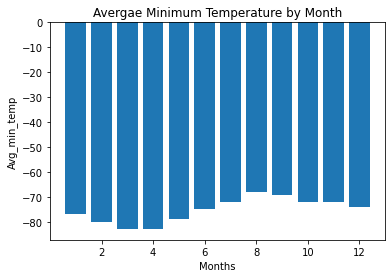

In [16]:
# Plot avg_min_temp
plt.bar(mars_temp_month_df['month'],mars_temp_month_df['avg_min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_min_temp")

# Create title 
plt.title('Avergae Minimum Temperature by Month')

In [17]:
# The coldest months
min_avg_temp = mars_temp_month_df['avg_min_temp'].min()
month_min_temp=mars_temp_month_df.loc[mars_temp_month_df['avg_min_temp']==min_avg_temp]
month_min_temp.set_index('month')

,avg_min_temp
month,
3,-83
4,-83


In [18]:
# The warmest month
max_avg_temp = mars_temp_month_df['avg_min_temp'].max()
month_max_temp=mars_temp_month_df.loc[mars_temp_month_df['avg_min_temp']==max_avg_temp]
month_max_temp.set_index('month')

,avg_min_temp
month,
8,-68


In [19]:
print("Months 3 and 4 are the coldest months with an average temp of -83 C. Month 8 is the warmest month with an average temp of -68C")

Months 3 and 4 are the coldest months with an average temp of -83 C. Month 8 is the warmest month with an average temp of -68C


In [20]:
# Which months have the lowest and the highest atmospheric pressure on Mars
group_by_month_df=mars_temp_df.groupby('month')
month_pressure_df=group_by_month_df.mean().loc[:,['pressure']]
month_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [21]:
# The month with the lowest atmospheric pressure  
min_avg_pressure= month_pressure_df['pressure'].min()
month_min_pressure=month_pressure_df.loc[month_pressure_df['pressure']==min_avg_pressure]
month_min_pressure

,pressure
month,
6,745.054422


In [22]:
# The month with the highest atmospheric pressure  
max_avg_pressure= month_pressure_df['pressure'].max()
month_max_pressure=month_pressure_df[month_pressure_df['pressure']==max_avg_pressure]
month_max_pressure

,pressure
month,
9,913.30597


Text(0.5, 1.0, 'Avergae Pressure by Month')

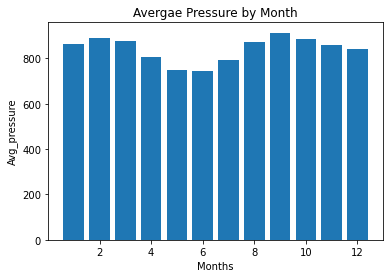

In [23]:
# Plot avg_pressure
x=range(1,13)
plt.bar(x,month_pressure_df['pressure'])

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_pressure")

# Create title 
plt.title('Avergae Pressure by Month')

In [24]:
print("Month 6 has the lowest atmospheric pressure with an average pressure of 745. Month 9 has the highest atmospheric pressure with an average pressure of 913")

Month 6 has the lowest atmospheric pressure with an average pressure of 745. Month 9 has the highest atmospheric pressure with an average pressure of 913


In [25]:
# About how many terrestrial (Earth) days exist in a Martian year?
#Finding the original Sun longitude
starting_long=mars_temp_df['ls'].loc[0]
starting_long

155

In [26]:
# The Sun longitude will be the same after Approximately 1 Martial year
# find the next rows where longitude is equal the starting_long
next_long=mars_temp_df.loc[mars_temp_df['ls']==starting_long]
next_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [27]:
time_for_martian_year=next_long['terrestrial_date'].loc[0]
date_after_one_martial_year = next_long['terrestrial_date'].iloc[1]
one_martial_year= date_after_one_martial_year - time_for_martian_year
print(f'In one Martial year, nearly ',one_martial_year,'pass on Earth')

In one Martial year, nearly  686 days 00:00:00 pass on Earth


Text(0.5, 1.0, 'Daily minimum temperature')

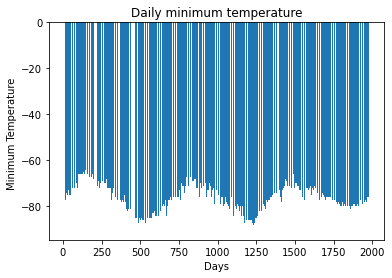

In [28]:
# Ploting the minimum temperature vs Martian Days 
plt.bar(mars_temp_df['sol'],mars_temp_df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily minimum temperature')

In [29]:
print("From the above graph, Mars circles the sun 3 times in about 2000 days. Thus, a Martial year is about 666 Earth days.")

From the above graph, Mars circles the sun 3 times in about 2000 days. Thus, a Martial year is about 666 Earth days.


In [30]:
# Export the DataFrame to a CSV file
mars_temp_df.to_csv('mars_data.csv',index=False)